In [1]:
#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import to
from time import time
from dateutil.parser import parse
import joblib

In [3]:
idvfc = pd.read_csv("idvfc_marzo2022_limpio.csv", encoding='latin1')

In [4]:
idvfc.head()

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
idvfc.describe()

,AÃ±o,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
count,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.00000,9984.000000
mean,2018.500000,16.500000,3.752404,3.970553,4.649439,4.013522,4.306490,4.216546,3.794772,3.951022,3.985076,4.249399,3.811298,3.59375,48.294271
std,2.291403,9.233555,34.265206,36.541827,42.480788,40.146198,40.555541,40.472136,35.989676,38.520873,40.664927,43.945803,39.401086,38.04821,454.200239
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2016.750000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2018.500000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2020.250000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000
max,2022.000000,32.000000,1486.000000,1458.000000,1563.000000,1652.000000,1604.000000,1510.000000,1515.000000,1578.000000,1901.000000,1944.000000,1658.000000,1913.00000,18150.000000


In [6]:
idvfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AÃ±o               9984 non-null   int64  
 1   Clave_Ent          9984 non-null   int64  
 2   Entidad            9984 non-null   object 
 3   Tipo_de_delito     9984 non-null   object 
 4   Subtipo_de_delito  9984 non-null   object 
 5   Modalidad          9984 non-null   object 
 6   Sexo               9984 non-null   object 
 7   Rango_de_edad      9984 non-null   object 
 8   Enero              9984 non-null   int64  
 9   Febrero            9984 non-null   int64  
 10  Marzo              9984 non-null   int64  
 11  Abril              9984 non-null   float64
 12  Mayo               9984 non-null   float64
 13  Junio              9984 non-null   float64
 14  Julio              9984 non-null   float64
 15  Agosto             9984 non-null   float64
 16  Septiembre         9984 

In [7]:
idvfc.columns

Index(['AÃ±o', 'Clave_Ent', 'Entidad', 'Tipo_de_delito', 'Subtipo_de_delito',
       'Modalidad', 'Sexo', 'Rango_de_edad', 'Enero', 'Febrero', 'Marzo',
       'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
       'Noviembre', 'Diciembre', 'Total'],
      dtype='object')

In [8]:
idvfc.rename({'AÃ±o':'Año'}, axis=1)


,Año,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,2022,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9982,2022,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
idvfc.shape

(9984, 21)

In [10]:
idvfc.columns.to_series().groupby(idvfc.dtypes).groups

{int64: ['AÃ±o', 'Clave_Ent', 'Enero', 'Febrero', 'Marzo'], float64: ['Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Total'], object: ['Entidad', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad', 'Sexo', 'Rango_de_edad']}

In [11]:
idvfc.isna().any()

AÃ±o                 False
Clave_Ent            False
Entidad              False
Tipo_de_delito       False
Subtipo_de_delito    False
Modalidad            False
Sexo                 False
Rango_de_edad        False
Enero                False
Febrero              False
Marzo                False
Abril                False
Mayo                 False
Junio                False
Julio                False
Agosto               False
Septiembre           False
Octubre              False
Noviembre            False
Diciembre            False
Total                False
dtype: bool

In [12]:
idvfc.Subtipo_de_delito.unique()

array(['Homicidio doloso', 'Lesiones dolosas', 'Feminicidio', 'Rapto'],
      dtype=object)

In [13]:
#Total de cada subtipo de delito del 2015 a mazo 2022

subd= idvfc.groupby(['Subtipo_de_delito'])['Total'].sum()
subd

Subtipo_de_delito
Feminicidio           5957.0
Homicidio doloso     18246.0
Lesiones dolosas    456488.0
Rapto                 1479.0
Name: Total, dtype: float64

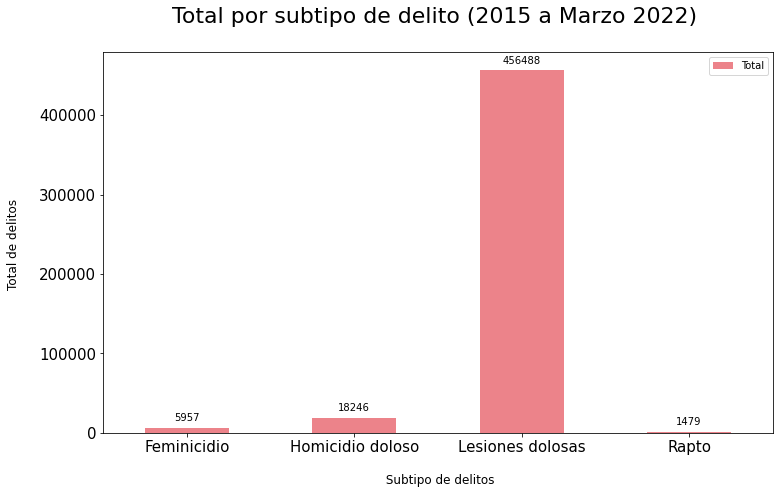

In [14]:

subdelito_split = idvfc[[ "Total", "Subtipo_de_delito"]]
sectors = subdelito_split .groupby ("Subtipo_de_delito")
subdelito_split = pd.DataFrame(idvfc.groupby(['Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelito_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito (2015 a Marzo 2022) \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelito_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [15]:
idvfc.columns

Index(['AÃ±o', 'Clave_Ent', 'Entidad', 'Tipo_de_delito', 'Subtipo_de_delito',
       'Modalidad', 'Sexo', 'Rango_de_edad', 'Enero', 'Febrero', 'Marzo',
       'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
       'Noviembre', 'Diciembre', 'Total'],
      dtype='object')

In [16]:
grp = idvfc.groupby(['AÃ±o'])

In [17]:
selected_group = grp.get_group(2015)
selected_group

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2015,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1244,2015,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,2015,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,2015,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio            427.0
      Homicidio doloso      1734.0
      Lesiones dolosas     63723.0
      Rapto                  341.0
Name: Total, dtype: float64

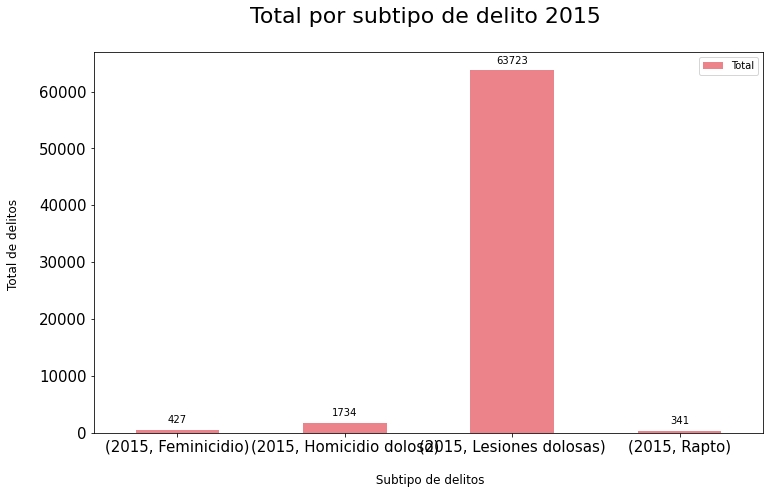

In [19]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2015 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [20]:
selected_group = grp.get_group(2016)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2016  Feminicidio            647.0
      Homicidio doloso      2189.0
      Lesiones dolosas     62847.0
      Rapto                  312.0
Name: Total, dtype: float64

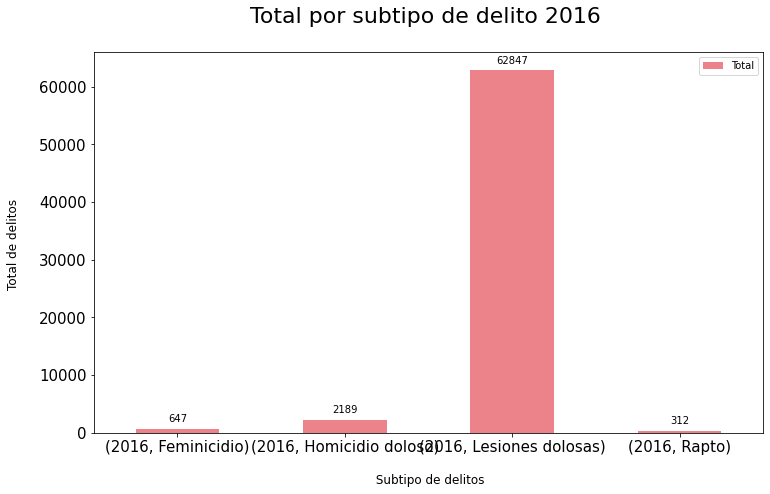

In [21]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2016 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [22]:
selected_group = grp.get_group(2017)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2017  Feminicidio            766.0
      Homicidio doloso      2535.0
      Lesiones dolosas     66724.0
      Rapto                  224.0
Name: Total, dtype: float64

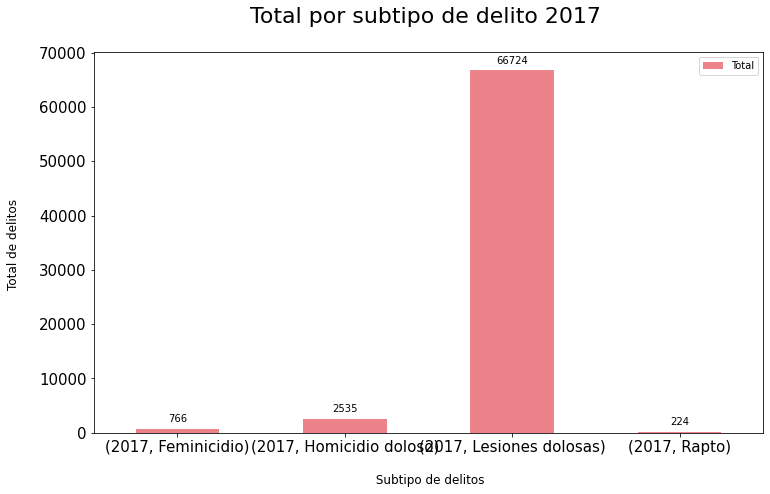

In [23]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2017 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [24]:
selected_group = grp.get_group(2018)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2018  Feminicidio            918.0
      Homicidio doloso      2761.0
      Lesiones dolosas     61957.0
      Rapto                  149.0
Name: Total, dtype: float64

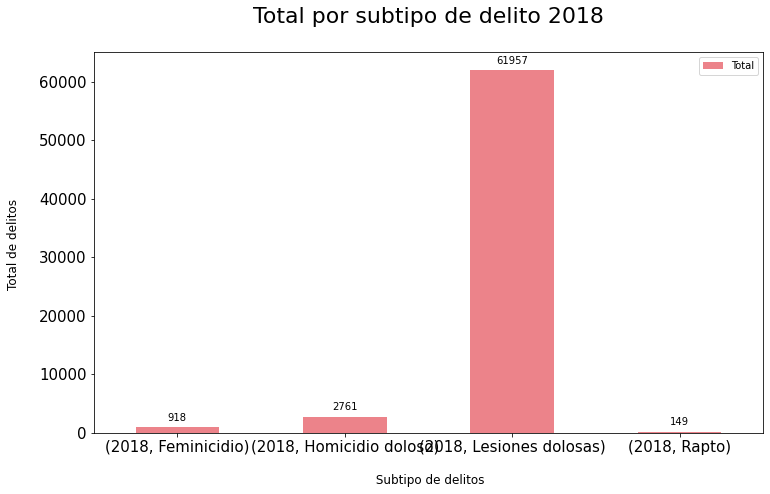

In [25]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2018\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [26]:
selected_group = grp.get_group(2019)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2019  Feminicidio            973.0
      Homicidio doloso      2866.0
      Lesiones dolosas     66345.0
      Rapto                  126.0
Name: Total, dtype: float64

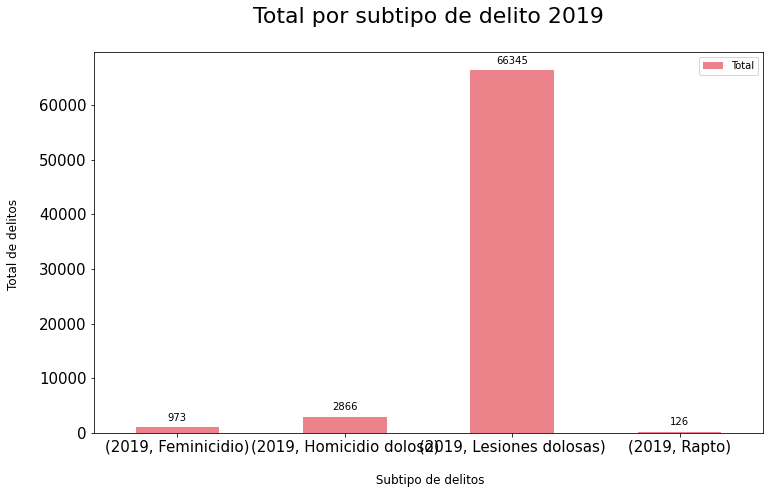

In [27]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2019\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [28]:
selected_group = grp.get_group(2020)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2020  Feminicidio            977.0
      Homicidio doloso      2792.0
      Lesiones dolosas     57495.0
      Rapto                  150.0
Name: Total, dtype: float64

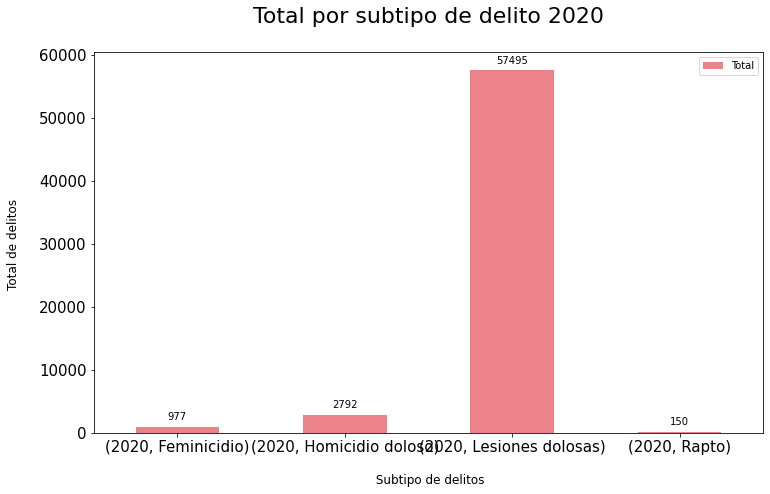

In [29]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2020\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [30]:
selected_group = grp.get_group(2021)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2021  Feminicidio           1015.0
      Homicidio doloso      2741.0
      Lesiones dolosas     62365.0
      Rapto                  150.0
Name: Total, dtype: float64

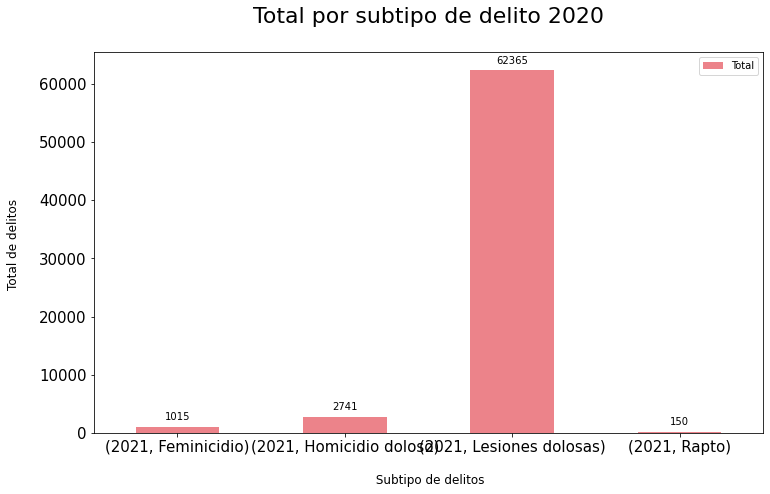

In [31]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2020\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [32]:
selected_group = grp.get_group(2022)
selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2022  Feminicidio            234.0
      Homicidio doloso       628.0
      Lesiones dolosas     15032.0
      Rapto                   27.0
Name: Total, dtype: float64

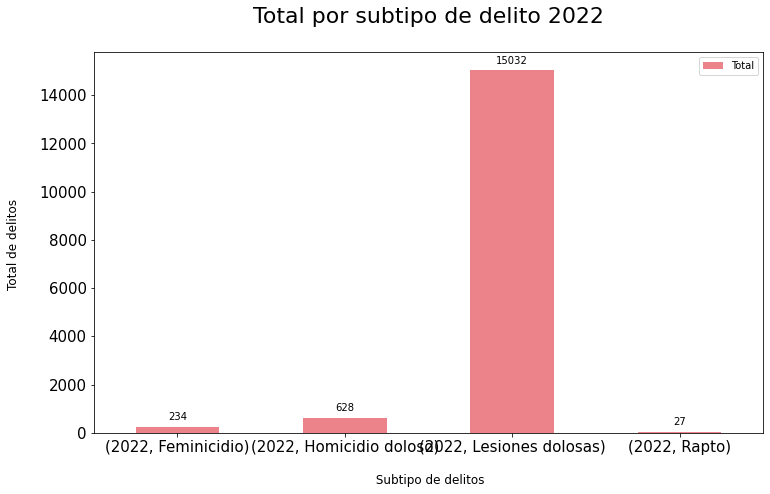

In [33]:
subdelitoano_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitoano_split .groupby ("Subtipo_de_delito")
subdelitoano_split = pd.DataFrame(selected_group.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitoano_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Total por subtipo de delito 2022\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitoano_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [34]:
grp2=idvfc.groupby(['Subtipo_de_delito'])

In [35]:
selected_group2 = grp2.get_group('Feminicidio')
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio           427.0
2016  Feminicidio           647.0
2017  Feminicidio           766.0
2018  Feminicidio           918.0
2019  Feminicidio           973.0
2020  Feminicidio           977.0
2021  Feminicidio          1015.0
2022  Feminicidio           234.0
Name: Total, dtype: float64

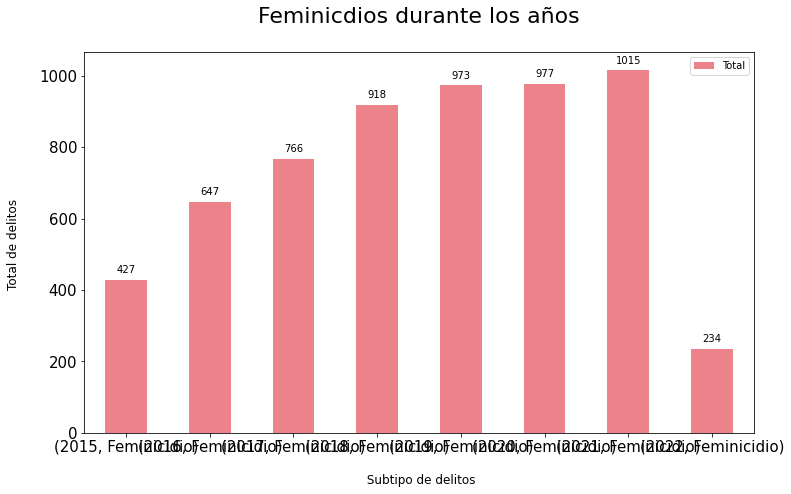

In [36]:
subdelitofem_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitofem_split .groupby ("Subtipo_de_delito")
subdelitofem_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitofem_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicdios durante los años\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitofem_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [37]:
selected_group3 = grp2.get_group('Homicidio doloso')
selected_group3.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2015  Homicidio doloso     1734.0
2016  Homicidio doloso     2189.0
2017  Homicidio doloso     2535.0
2018  Homicidio doloso     2761.0
2019  Homicidio doloso     2866.0
2020  Homicidio doloso     2792.0
2021  Homicidio doloso     2741.0
2022  Homicidio doloso      628.0
Name: Total, dtype: float64

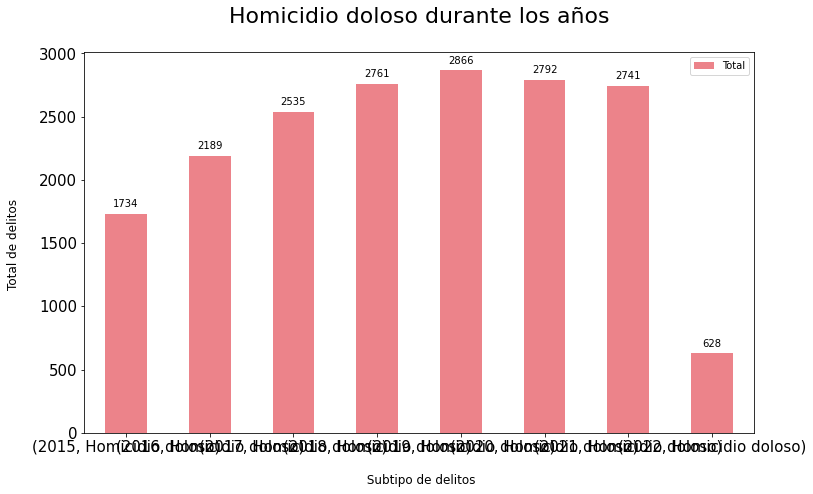

In [38]:
subdelitohom_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitohom_split .groupby ("Subtipo_de_delito")
subdelitohom_split = pd.DataFrame(selected_group3.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitohom_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Homicidio doloso durante los años\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitohom_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [39]:
selected_group4 = grp2.get_group('Rapto')
selected_group4.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum()

AÃ±o  Subtipo_de_delito
2015  Rapto                341.0
2016  Rapto                312.0
2017  Rapto                224.0
2018  Rapto                149.0
2019  Rapto                126.0
2020  Rapto                150.0
2021  Rapto                150.0
2022  Rapto                 27.0
Name: Total, dtype: float64

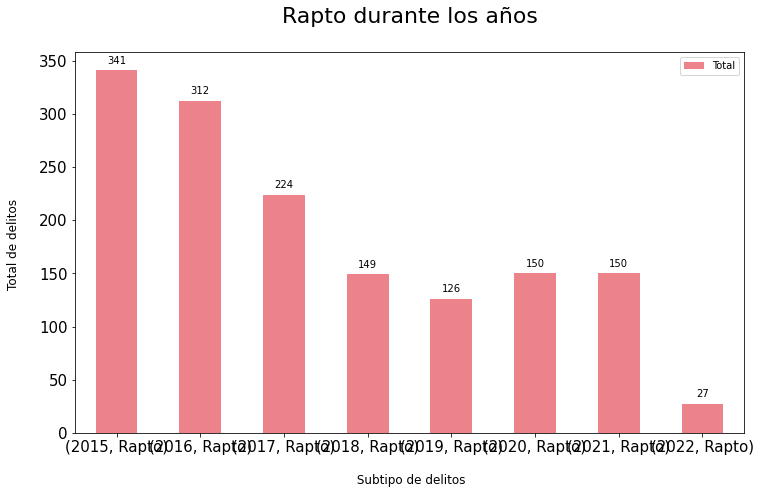

In [40]:
subdelitorap_split = idvfc[[ "Total", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitorap_split .groupby ("Subtipo_de_delito")
subdelitorap_split = pd.DataFrame(selected_group4.groupby(['AÃ±o','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  subdelitorap_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de delitos \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Rapto durante los años\n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(subdelitorap_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [41]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Enero'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          33
2016  Feminicidio          41
2017  Feminicidio          51
2018  Feminicidio          70
2019  Feminicidio          72
2020  Feminicidio          75
2021  Feminicidio          76
2022  Feminicidio          79
Name: Enero, dtype: int64

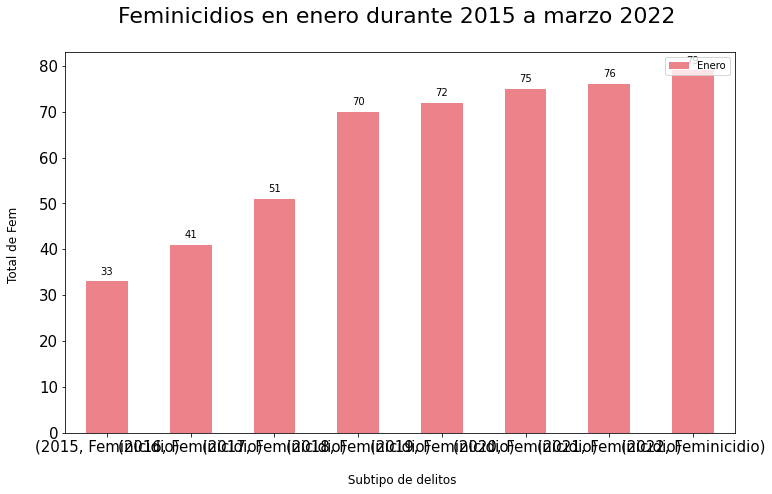

In [42]:
fem_enero_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
sectors = subdelitorap_split .groupby ("AÃ±o")
fem_enero_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Enero'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_enero_split[["Enero"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en enero durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_enero_split[["Enero"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [43]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Febrero'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          30
2016  Feminicidio          54
2017  Feminicidio          69
2018  Feminicidio          70
2019  Feminicidio          70
2020  Feminicidio          92
2021  Feminicidio          78
2022  Feminicidio          82
Name: Febrero, dtype: int64

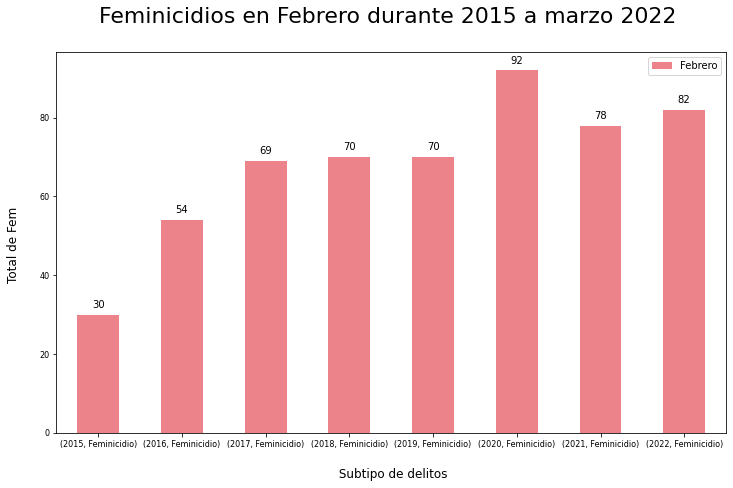

In [44]:
fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Febrero'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Febrero"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Febrero durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_enero_split[["Enero"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [45]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Marzo'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio           33
2016  Feminicidio           70
2017  Feminicidio           63
2018  Feminicidio           72
2019  Feminicidio           83
2020  Feminicidio           77
2021  Feminicidio          102
2022  Feminicidio           73
Name: Marzo, dtype: int64

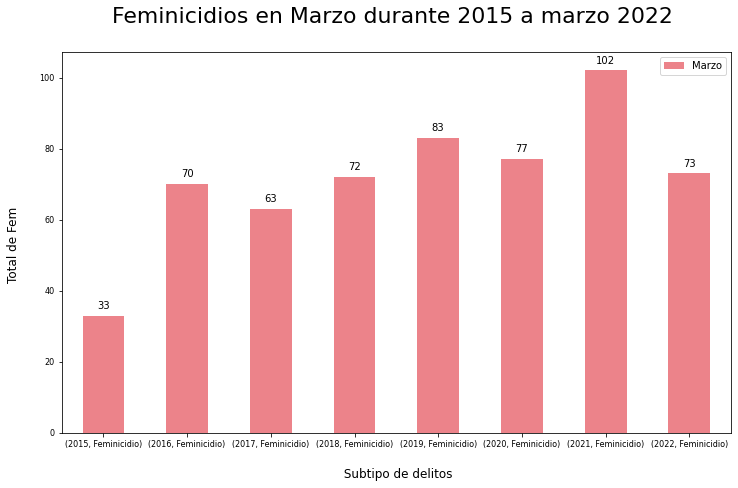

In [46]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Marzo'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Marzo"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Marzo durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Marzo"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [47]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Abril'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          36.0
2016  Feminicidio          63.0
2017  Feminicidio          62.0
2018  Feminicidio          81.0
2019  Feminicidio          68.0
2020  Feminicidio          73.0
2021  Feminicidio          82.0
2022  Feminicidio           0.0
Name: Abril, dtype: float64

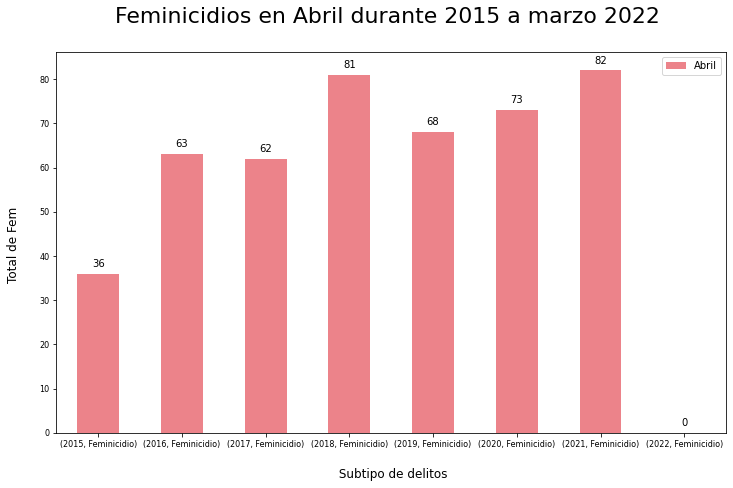

In [48]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Abril'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Abril"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Abril durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Abril"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [49]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Mayo'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio           28.0
2016  Feminicidio           52.0
2017  Feminicidio           69.0
2018  Feminicidio           64.0
2019  Feminicidio           80.0
2020  Feminicidio           75.0
2021  Feminicidio          111.0
2022  Feminicidio            0.0
Name: Mayo, dtype: float64

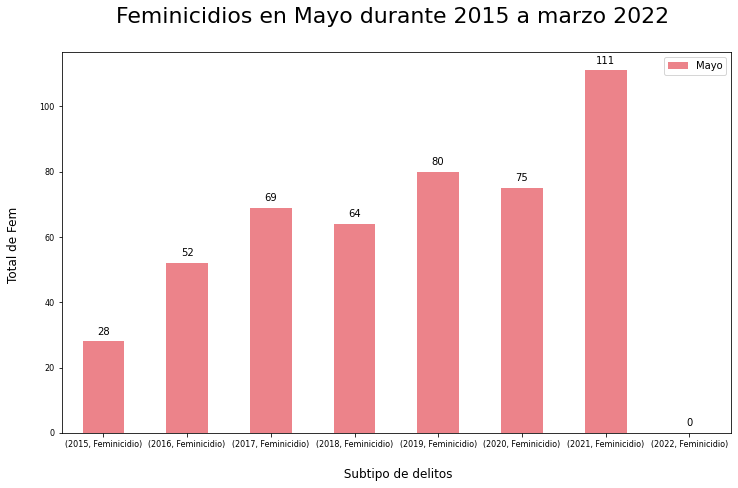

In [50]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Mayo'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Mayo"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Mayo durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Mayo"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [51]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Junio'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          28.0
2016  Feminicidio          60.0
2017  Feminicidio          77.0
2018  Feminicidio          79.0
2019  Feminicidio          79.0
2020  Feminicidio          97.0
2021  Feminicidio          86.0
2022  Feminicidio           0.0
Name: Junio, dtype: float64

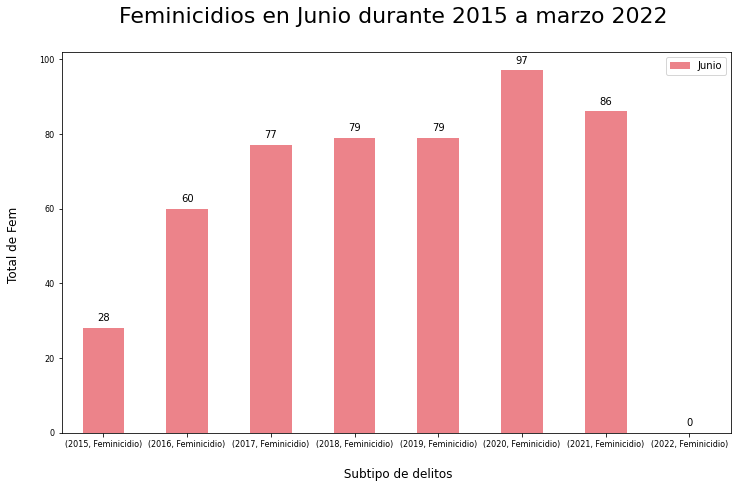

In [52]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Junio'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Junio"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Junio durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Junio"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [53]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Julio'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          37.0
2016  Feminicidio          43.0
2017  Feminicidio          75.0
2018  Feminicidio          84.0
2019  Feminicidio          88.0
2020  Feminicidio          77.0
2021  Feminicidio          72.0
2022  Feminicidio           0.0
Name: Julio, dtype: float64

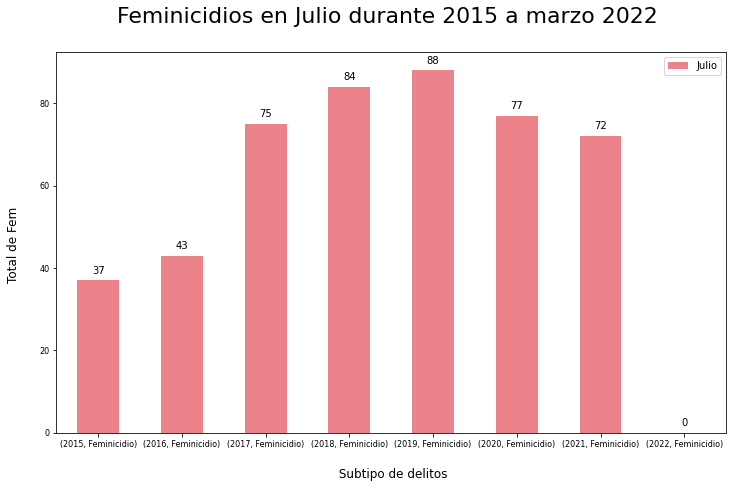

In [54]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Julio'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Julio"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Julio durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Julio"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [55]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Agosto'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio           40.0
2016  Feminicidio           46.0
2017  Feminicidio           70.0
2018  Feminicidio           65.0
2019  Feminicidio           94.0
2020  Feminicidio           75.0
2021  Feminicidio          112.0
2022  Feminicidio            0.0
Name: Agosto, dtype: float64

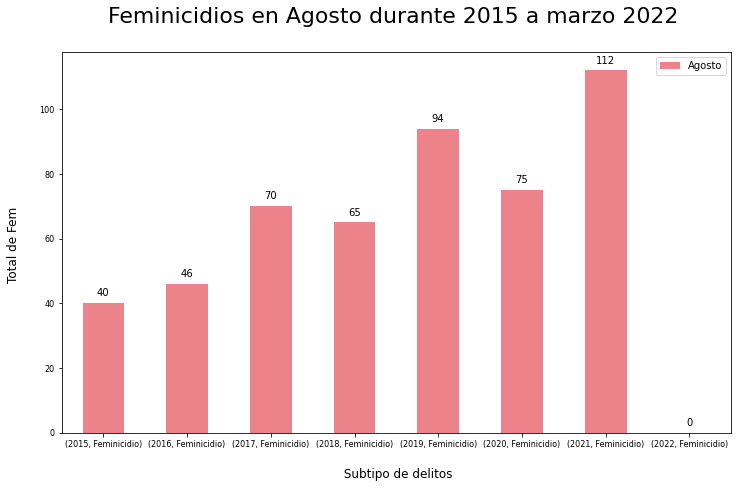

In [56]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Agosto'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Agosto"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Agosto durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Agosto"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [57]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Septiembre'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          44.0
2016  Feminicidio          57.0
2017  Feminicidio          56.0
2018  Feminicidio          78.0
2019  Feminicidio          90.0
2020  Feminicidio          82.0
2021  Feminicidio          70.0
2022  Feminicidio           0.0
Name: Septiembre, dtype: float64

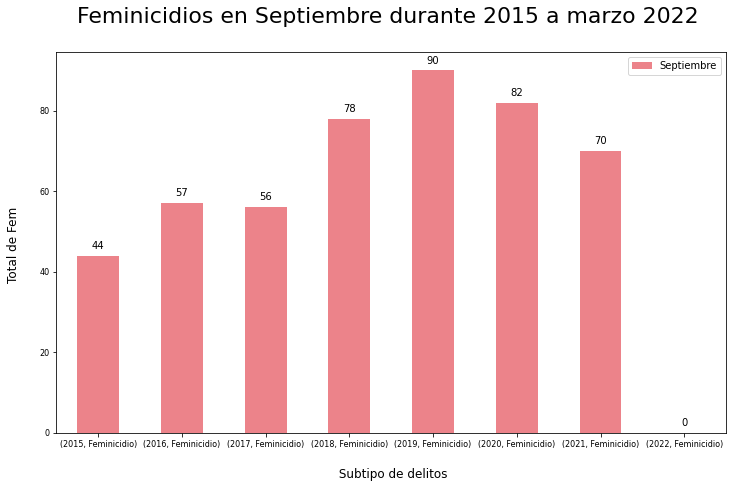

In [58]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Septiembre'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Septiembre"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Septiembre durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Septiembre"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [59]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Octubre'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          48.0
2016  Feminicidio          48.0
2017  Feminicidio          61.0
2018  Feminicidio          85.0
2019  Feminicidio          72.0
2020  Feminicidio          82.0
2021  Feminicidio          71.0
2022  Feminicidio           0.0
Name: Octubre, dtype: float64

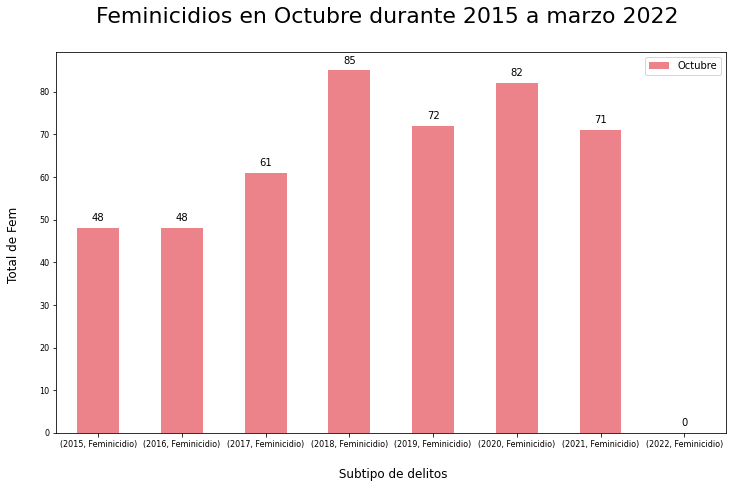

In [60]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Octubre'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Octubre"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Octubre durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Octubre"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [61]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Noviembre'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio          30.0
2016  Feminicidio          63.0
2017  Feminicidio          58.0
2018  Feminicidio          69.0
2019  Feminicidio          81.0
2020  Feminicidio          88.0
2021  Feminicidio          74.0
2022  Feminicidio           0.0
Name: Noviembre, dtype: float64

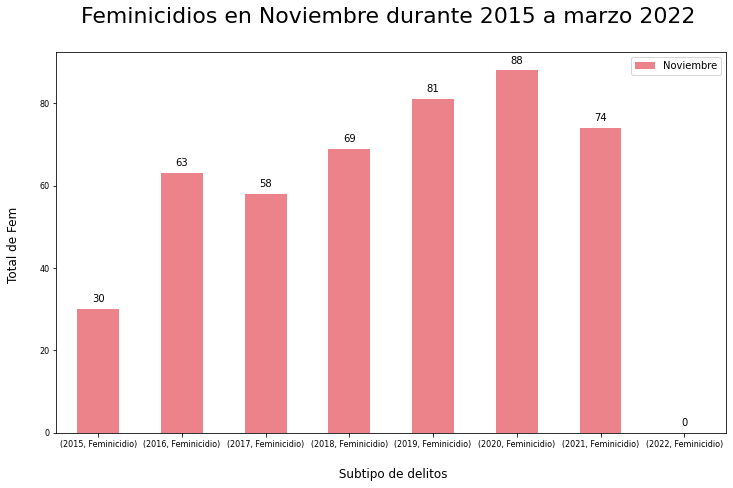

In [62]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Noviembre'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Noviembre"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Noviembre durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Noviembre"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [63]:
selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Diciembre'].sum()

AÃ±o  Subtipo_de_delito
2015  Feminicidio           40.0
2016  Feminicidio           50.0
2017  Feminicidio           55.0
2018  Feminicidio          101.0
2019  Feminicidio           96.0
2020  Feminicidio           84.0
2021  Feminicidio           81.0
2022  Feminicidio            0.0
Name: Diciembre, dtype: float64

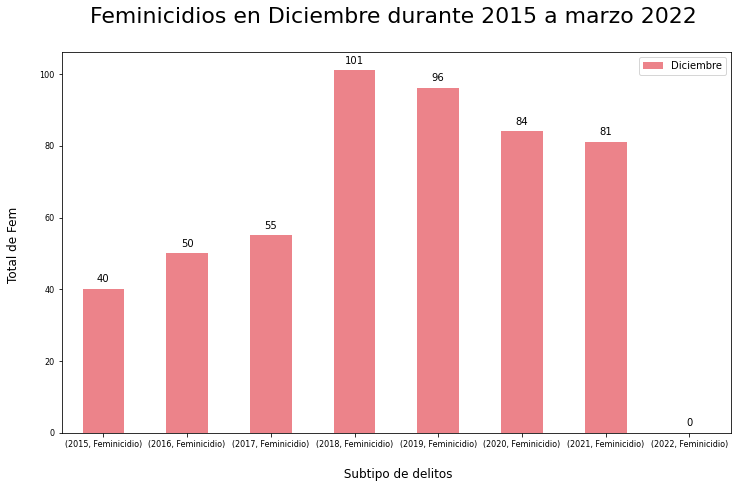

In [64]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['AÃ±o','Subtipo_de_delito'])['Diciembre'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Diciembre"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Feminicidios en Diciembre durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Diciembre"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [65]:
#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in idvfc.columns[1:]:
    if idvfc[col].dtype == 'object':
        if len(list(idvfc[col].unique())) <= 2:
            le.fit(idvfc[col])
            idvfc[col] = le.transform(idvfc[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [66]:
idvfc

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,0,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,0,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,0,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,0,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,0,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,0,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,0,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,2022,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,0,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9982,2022,32,Zacatecas,Feminicidio,Feminicidio,No especificado,0,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


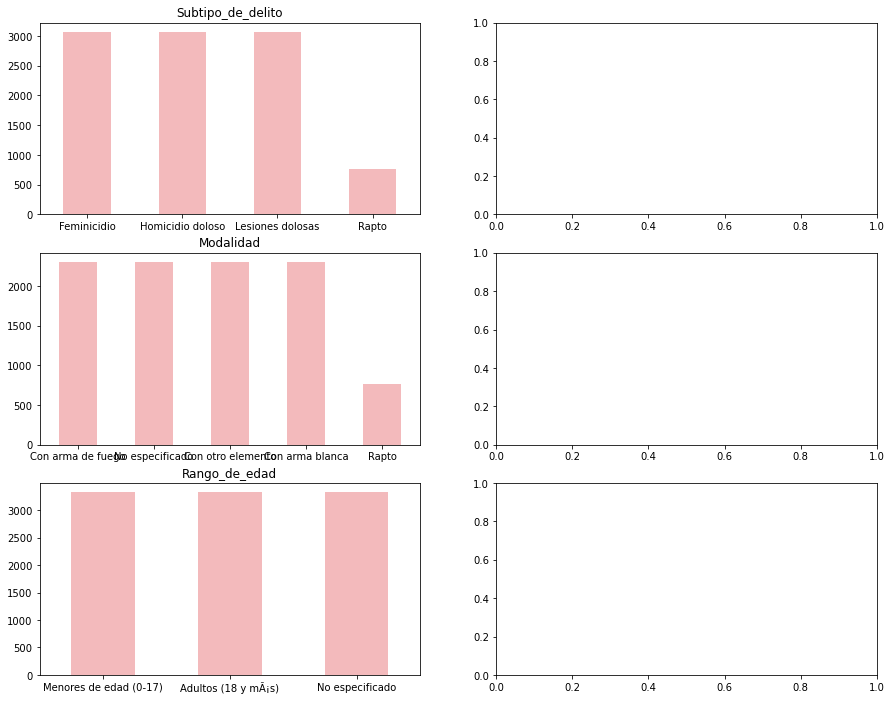

In [67]:
categ = ['Subtipo_de_delito','Modalidad','Rango_de_edad']

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (15,12))
for i, item in enumerate(categ):
    if i < 3:
        ax = idvfc[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    
    ax.set_title(item)

In [68]:
subd= idvfc.groupby(['Modalidad'])['Total'].sum()
subd

Modalidad
Con arma blanca       13492.0
Con arma de fuego     20281.0
Con otro elemento    379373.0
No especificado       67545.0
Rapto                  1479.0
Name: Total, dtype: float64

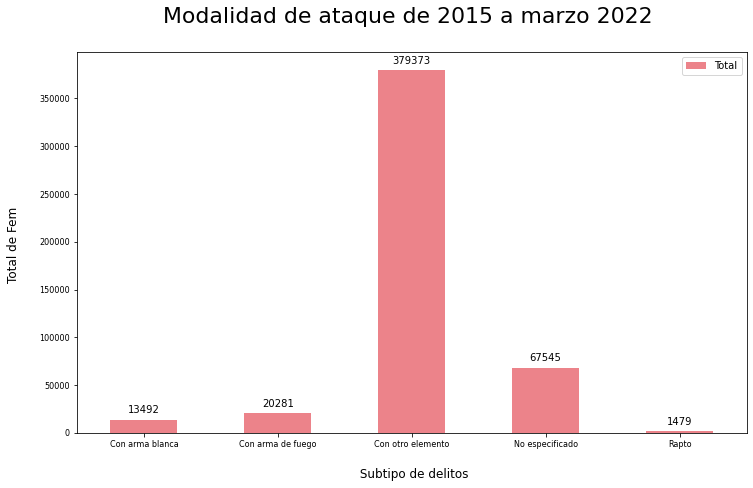

In [69]:
fem_feb_split = idvfc[[ "Modalidad","Total"]]
sectors = fem_feb_split .groupby ("Modalidad")
fem_feb_split = pd.DataFrame(idvfc.groupby(['Modalidad'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Modalidad de ataque de 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

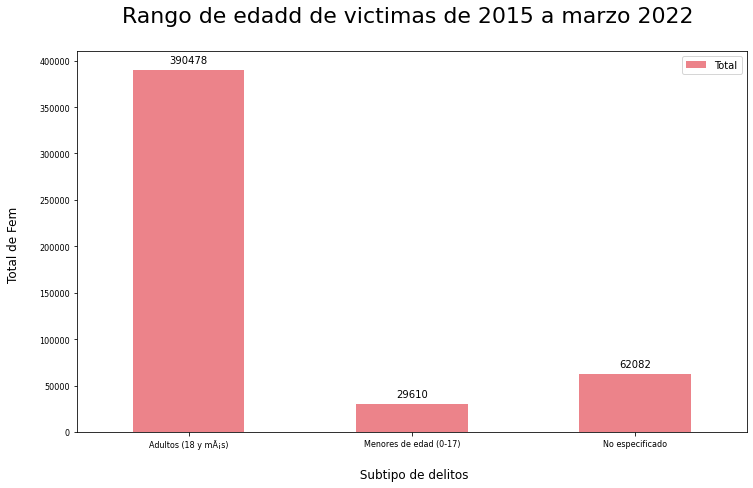

In [70]:
fem_feb_split = idvfc[[ "Rango_de_edad","Total"]]
sectors = fem_feb_split .groupby ("Rango_de_edad")
fem_feb_split = pd.DataFrame(idvfc.groupby(['Rango_de_edad'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Rango de edadd de victimas de 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [71]:
selected_group2 = grp2.get_group('Feminicidio')
selected_group2.groupby(['Modalidad','Subtipo_de_delito'])['Total'].sum()

Modalidad          Subtipo_de_delito
Con arma blanca    Feminicidio          1250.0
Con arma de fuego  Feminicidio          1325.0
Con otro elemento  Feminicidio          2921.0
No especificado    Feminicidio           461.0
Name: Total, dtype: float64

In [72]:
selected_group2 = grp2.get_group('Feminicidio')
selected_group2.groupby(['Rango_de_edad','Subtipo_de_delito'])['Total'].sum()

Rango_de_edad           Subtipo_de_delito
Adultos (18 y mÃ¡s)     Feminicidio          4713.0
Menores de edad (0-17)  Feminicidio           603.0
No especificado         Feminicidio           641.0
Name: Total, dtype: float64

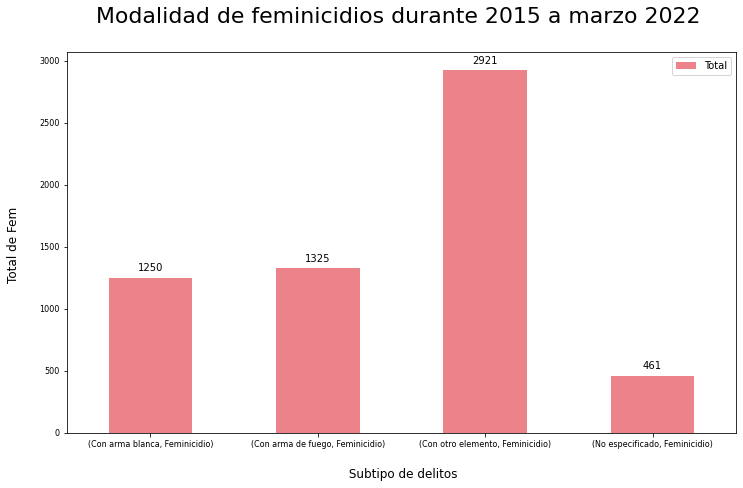

In [73]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['Modalidad','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Modalidad de feminicidios durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

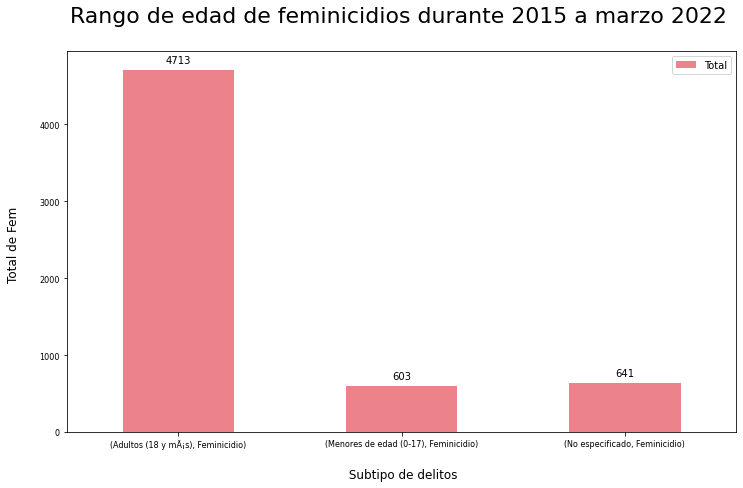

In [74]:
#fem_feb_split = idvfc[[ "Enero", "Subtipo_de_delito","AÃ±o"]]
#sectors = fem_feb_split .groupby ("AÃ±o")
fem_feb_split = pd.DataFrame(selected_group2.groupby(['Rango_de_edad','Subtipo_de_delito'])['Total'].sum())
#contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  fem_feb_split[["Total"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 8, stacked=False)

plt.ylabel('Total de Fem \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Subtipo de delitos',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Rango de edad de feminicidios durante 2015 a marzo 2022 \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(fem_feb_split[["Total"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)

In [75]:
idvfc_num = idvfc.select_dtypes(include = ['int64'])
idvfc_num.head()

,AÃ±o,Clave_Ent,Sexo,Enero,Febrero,Marzo
0,2015,1,0,0,0,0
1,2015,1,0,0,0,0
2,2015,1,0,0,0,0
3,2015,1,0,0,0,0
4,2015,1,0,0,0,0


In [76]:
idvfc_num = idvfc.select_dtypes(include = ['int64','float64'])
idvfc_num.head()

,AÃ±o,Clave_Ent,Sexo,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
idvfc_num_corr = idvfc_num.corr()['Total'][:-1] # -1 because the latest row is total
golden_features_list = idvfc_num_corr[abs(idvfc_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with total:\n{}".format(len(golden_features_list), golden_features_list))

There is 12 strongly correlated values with total:
Abril         0.985756
Noviembre     0.975502
Septiembre    0.973491
Octubre       0.972615
Mayo          0.971598
Julio         0.971579
Agosto        0.968677
Junio         0.965965
Diciembre     0.953379
Febrero       0.949017
Marzo         0.939920
Enero         0.939716
Name: Total, dtype: float64


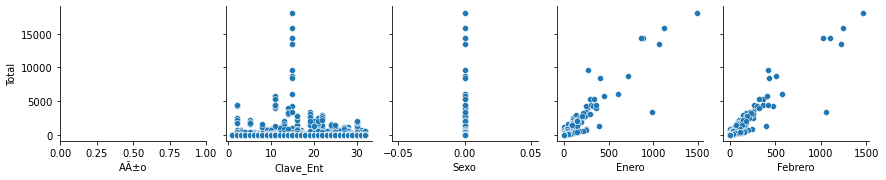

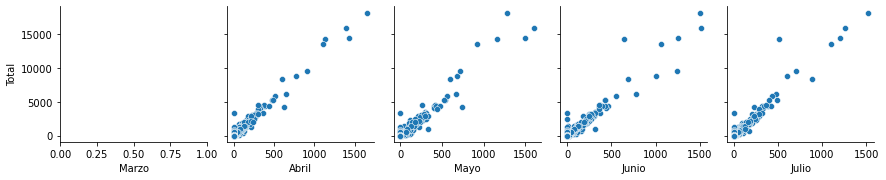

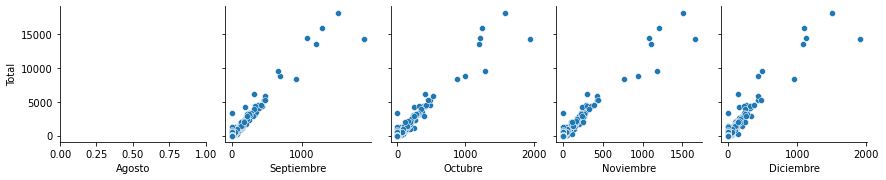

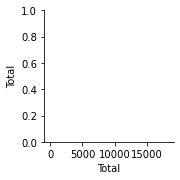

In [78]:
for i in range(0, len(idvfc_num.columns), 5):
    sns.pairplot(data=idvfc_num,
                x_vars=idvfc_num.columns[i:i+5],
                y_vars=['Total'])

In [79]:
import operator

individual_features_idvfc = []
for i in range(0, len(idvfc_num.columns) - 1): # -1 because the last column is total
    tmpDf = idvfc_num[[idvfc_num.columns[i], 'Total']]
    tmpDf = tmpDf[tmpDf[idvfc_num.columns[i]] != 0]
    individual_features_idvfc.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Total'][0] for feature in individual_features_idvfc}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

           AÃ±o: -0.0179370984353181
      Clave_Ent: -0.011217021005929488
           Sexo:             nan
          Marzo: 0.9380389672210467
          Enero: 0.9382407754055585
        Febrero: 0.9474170336224701
      Diciembre: 0.9564492196362054
          Junio: 0.9703149329377511
         Agosto: 0.9715559096649988
          Julio: 0.9747777266977143
           Mayo: 0.974874708095615
        Octubre: 0.9761708668249046
     Septiembre: 0.9767434142087524
      Noviembre: 0.9790147805577853
          Abril: 0.9896486950774396


In [80]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with total:\n{}".format(len(golden_features_list), golden_features_list))

There is 12 strongly correlated values with total:
['Marzo', 'Enero', 'Febrero', 'Diciembre', 'Junio', 'Agosto', 'Julio', 'Mayo', 'Octubre', 'Septiembre', 'Noviembre', 'Abril']


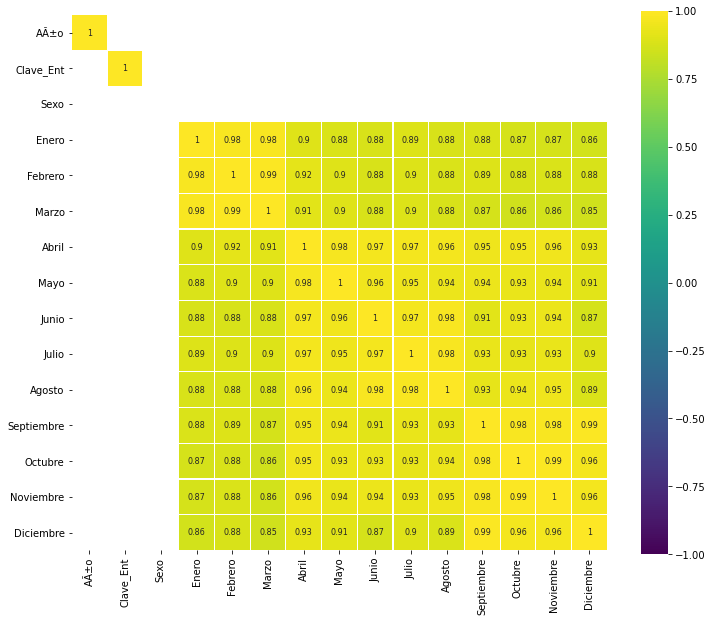

In [81]:
corr = idvfc_num.drop('Total', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [82]:
categ_features_list = ['Subtipo_de_delito','Modalidad','Rango_de_edad','Entidad']

In [83]:
idvfc_not_num = idvfc[categ_features_list]
idvfc_not_num

,Subtipo_de_delito,Modalidad,Rango_de_edad,Entidad
0,Homicidio doloso,Con arma de fuego,Menores de edad (0-17),Aguascalientes
1,Homicidio doloso,Con arma blanca,Menores de edad (0-17),Aguascalientes
2,Homicidio doloso,Con otro elemento,Menores de edad (0-17),Aguascalientes
3,Homicidio doloso,No especificado,Menores de edad (0-17),Aguascalientes
4,Lesiones dolosas,Con arma de fuego,Menores de edad (0-17),Aguascalientes
...,...,...,...,...
9979,Feminicidio,Con arma de fuego,No especificado,Zacatecas
9980,Feminicidio,Con arma blanca,No especificado,Zacatecas
9981,Feminicidio,Con otro elemento,No especificado,Zacatecas
9982,Feminicidio,No especificado,No especificado,Zacatecas


In [118]:
to_drop = ['Clave_Ent']
idvfc.drop(to_drop, inplace =True , axis=1)

In [119]:
idvfc

,AÃ±o,Entidad,Subtipo_de_delito,Modalidad,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,Aguascalientes,Homicidio doloso,Con arma de fuego,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,Aguascalientes,Homicidio doloso,Con arma blanca,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,Aguascalientes,Homicidio doloso,Con otro elemento,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,Aguascalientes,Homicidio doloso,No especificado,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Aguascalientes,Lesiones dolosas,Con arma de fuego,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,Zacatecas,Feminicidio,Con arma de fuego,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,2022,Zacatecas,Feminicidio,Con arma blanca,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,2022,Zacatecas,Feminicidio,Con otro elemento,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9982,2022,Zacatecas,Feminicidio,No especificado,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Encode Categorical data----------------------------------------------------------------

#Incase if user_id is an object:
    
#identity = dataset["customerID"]

#idvfc = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

idvfc_enc = pd.get_dummies(idvfc)

#Rejoin userid to dataset (column concatenation)

#dataset = pd.concat([dataset, identity], axis = 1)

In [121]:
idvfc_enc

,AÃ±o,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Entidad_Aguascalientes,Entidad_Baja California,Entidad_Baja California Sur,Entidad_Campeche,Entidad_Chiapas,Entidad_Chihuahua,Entidad_Ciudad de MÃ©xico,Entidad_Coahuila de Zaragoza,Entidad_Colima,Entidad_Durango,Entidad_Guanajuato,Entidad_Guerrero,Entidad_Hidalgo,Entidad_Jalisco,Entidad_MichoacÃ¡n de Ocampo,Entidad_Morelos,Entidad_MÃ©xico,Entidad_Nayarit,Entidad_Nuevo LeÃ³n,Entidad_Oaxaca,Entidad_Puebla,Entidad_QuerÃ©taro,Entidad_Quintana Roo,Entidad_San Luis PotosÃ­,Entidad_Sinaloa,Entidad_Sonora,Entidad_Tabasco,Entidad_Tamaulipas,Entidad_Tlaxcala,Entidad_Veracruz de Ignacio de la Llave,Entidad_YucatÃ¡n,Entidad_Zacatecas,Subtipo_de_delito_Feminicidio,Subtipo_de_delito_Homicidio doloso,Subtipo_de_delito_Lesiones dolosas,Subtipo_de_delito_Rapto,Modalidad_Con arma blanca,Modalidad_Con arma de fuego,Modalidad_Con otro elemento,Modalidad_No especificado,Modalidad_Rapto,Rango_de_edad_Adultos (18 y mÃ¡s),Rango_de_edad_Menores de edad (0-17),Rango_de_edad_No especificado
0,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,2015,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
9980,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
9981,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
9982,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1


In [122]:
#Step 11: Split dataset into dependent and independent variables-----------------------------------

#identify response variable:
    
response = idvfc_enc["Total"]

idvfc_enc = idvfc_enc.drop(columns="Total")

In [123]:
idvfc_enc

,AÃ±o,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Entidad_Aguascalientes,Entidad_Baja California,Entidad_Baja California Sur,Entidad_Campeche,Entidad_Chiapas,Entidad_Chihuahua,Entidad_Ciudad de MÃ©xico,Entidad_Coahuila de Zaragoza,Entidad_Colima,Entidad_Durango,Entidad_Guanajuato,Entidad_Guerrero,Entidad_Hidalgo,Entidad_Jalisco,Entidad_MichoacÃ¡n de Ocampo,Entidad_Morelos,Entidad_MÃ©xico,Entidad_Nayarit,Entidad_Nuevo LeÃ³n,Entidad_Oaxaca,Entidad_Puebla,Entidad_QuerÃ©taro,Entidad_Quintana Roo,Entidad_San Luis PotosÃ­,Entidad_Sinaloa,Entidad_Sonora,Entidad_Tabasco,Entidad_Tamaulipas,Entidad_Tlaxcala,Entidad_Veracruz de Ignacio de la Llave,Entidad_YucatÃ¡n,Entidad_Zacatecas,Subtipo_de_delito_Feminicidio,Subtipo_de_delito_Homicidio doloso,Subtipo_de_delito_Lesiones dolosas,Subtipo_de_delito_Rapto,Modalidad_Con arma blanca,Modalidad_Con arma de fuego,Modalidad_Con otro elemento,Modalidad_No especificado,Modalidad_Rapto,Rango_de_edad_Adultos (18 y mÃ¡s),Rango_de_edad_Menores de edad (0-17),Rango_de_edad_No especificado
0,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,2015,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,2015,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
9980,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
9981,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
9982,2022,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1


In [124]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------


#X_train, X_test, y_train, y_test = train_test_split(idvfc_enc, response,
#                                                    stratify=response, 
 #                                                   test_size = 0.2, #use 0.9 if data is huge.
 #                                                   random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(idvfc_enc,response,test_size=0.33, random_state=42)

In [125]:
#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6689, 57)
Number transactions y_train dataset:  (6689,)
Number transactions X_test dataset:  (3295, 57)
Number transactions y_test dataset:  (3295,)


In [126]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [130]:
#----------------------------------------------------------------------------------------
#-----------------Section C: Model Selection------------------------------------------
#----------------------------------------------------------------------------------------

#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                        class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [131]:
#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']



In [134]:
model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: Us

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,NaN,NaN,21.03,1.60
1,SVC,NaN,NaN,52.83,1.74
2,Kernel SVM,NaN,NaN,52.47,1.79
3,KNN,NaN,NaN,51.31,1.67
4,Gaussian NB,NaN,NaN,3.84,0.61
5,Decision Tree Classifier,NaN,NaN,69.97,1.62
6,Random Forest,NaN,NaN,66.68,1.66


In [137]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(X_train,y_train)

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [138]:
y_pred = logistic_Regression.predict(X_test)

In [140]:
log = accuracy_score(y_pred,y_test)*100
log

52.837632776934754

In [141]:
print(confusion_matrix(y_pred,y_test))

[[1720  291  180 ...    0    0    0]
 [  14    7    4 ...    0    0    0]
 [   0    1    7 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    1    0]]


In [143]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79      2601
         1.0       0.02      0.06      0.03       112
         2.0       0.04      0.09      0.05        75
         3.0       0.01      0.03      0.01        29
         4.0       0.00      0.00      0.00        16
         5.0       0.02      0.04      0.02        24
         6.0       0.00      0.00      0.00        17
         7.0       0.00      0.00      0.00        17
         8.0       0.02      0.06      0.03        17
         9.0       0.00      0.00      0.00        13
        10.0       0.00      0.00      0.00         0
        11.0       0.04      0.05      0.04        21
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         1
        16.0       0.06      0.14      0.09         7
        17.0       0.00    

/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [144]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [146]:
pred_gnb = gnb.predict(X_test)

In [148]:
GNB = accuracy_score(pred_gnb,y_test)*100
GNB

3.4597875569044008